# 12/13/22 - Kinematic analysis of SLACS lenses for KCWI data paper. Looking at the fast/slow rotator classification calculations, integrated velocity dispersions, etc.
# 01/10/23 - Cleaning up the notebook.
# 05/16/23 - With the marginalized gnog data.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({"figure.figsize" : (8, 6)})
from astropy.io import fits
import pandas as pd

###################################################################################################################################

date_of_kin = '2023-02-28_2'

#------------------------------------------------------------------------------
# Directories and files

# data directory
data_dir = '/data/raw_data/KECK_KCWI_SLACS_kinematics_shawn/'
hst_dir = '/data/raw_data/HST_SLACS_ACS/kcwi_kinematics_lenses/'
tables_dir = f'{data_dir}tables/'
mosaics_dir = f'{data_dir}mosaics/'
kinematics_full_dir = f'{data_dir}kinematics/'
kinematics_dir =f'{kinematics_full_dir}{date_of_kin}/'
print(f'Outputs will be in {kinematics_dir}')
print()

# target SN for voronoi binning
vorbin_SN_targets = np.array([10, 15, 20])

#################################################
# objects
obj_names = ['SDSSJ0029-0055',
             'SDSSJ0037-0942',
             'SDSSJ0330-0020',
             'SDSSJ1112+0826',
             'SDSSJ1204+0358',
             'SDSSJ1250+0523',
             'SDSSJ1306+0600',
             'SDSSJ1402+6321',
             'SDSSJ1531-0105',
             'SDSSJ1538+5817',
             'SDSSJ1621+3931',
             'SDSSJ1627-0053',
             'SDSSJ1630+4520',
             'SDSSJ2303+1422'
            ]

Outputs will be in /data/raw_data/KECK_KCWI_SLACS_kinematics_shawn/kinematics/2023-02-28_2/



# Bring in my paper and classifications table

In [4]:
paper_table = pd.read_csv(f'{tables_dir}paper_table_051223.csv')

In [5]:
paper_table

,obj_name,zlens,VD_reff,dVD_reff,VD_sdss,dVD_sdss,reff,ellipticity,V_sigma,lambda_R,lambda_R_class
0,SDSSJ0029-0055,0.227,196,12,216,15,2.30,0.16,0.095,0.075,slow
1,SDSSJ0037-0942,0.195,258,12,265,8,2.30,0.27,0.175,0.157,fast
2,SDSSJ0330-0020,0.351,220,15,273,23,1.26,0.23,0.143,0.122,slow
3,SDSSJ1112+0826,0.273,255,12,260,15,1.55,0.23,0.266,0.230,fast
4,SDSSJ1204+0358,0.164,244,11,251,12,1.63,0.03,0.087,0.071,slow
5,SDSSJ1250+0523,0.232,222,9,242,10,1.86,0.03,0.138,0.115,fast
6,SDSSJ1306+0600,0.173,224,17,248,14,2.08,0.09,0.112,0.084,slow
7,SDSSJ1402+6321,0.205,268,12,274,11,2.65,0.23,0.104,0.084,slow
8,SDSSJ1531-0105,0.160,256,24,261,10,2.73,0.32,0.088,0.076,slow
9,SDSSJ1538+5817,0.143,228,12,177,9,1.45,0.18,0.097,0.079,slow


In [6]:
# bring in my classifications table
date = '032723'
#class_df.to_csv(f'{data_dir}classification_table_{date}.csv',index=False)
classifications = pd.read_csv(f'{table_dir}classifications_etc_{date}.csv')

In [7]:
classifications.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'obj_name', 'class', 'subclass', 'comments',
       'ellipticity', 'V_sigma_mge', 'lambda_R_mge', 'PA_phot', 'delta_PA',
       'PA_kin', 'dPA_kin', 'oblate_prolate', 'SLACS delta_PA',
       'V_aperture_mge', 'VD_aperture_mge', 'dVD_aperture_mge',
       'Vrms_aperture_mge', 'SLACS VD', 'SLACS dVD', 'PA_kin_bspline',
       'dPA_kin_bspline', 'PA_phot_bspline', 'delta_PA_bspline',
       'ellipticity_bspline', 'kcwi_sigmapsf_bspline', 'reff_slacs_x',
       'ellipticity_slacs', 'reff_mge', 'reff_maj_mge', 'eps_reff_ellipse_mge',
       'luminosities_mge', 'reff_slacs_v', 'pa_slacs_v', 'VD_slacs_asb',
       'dVD_slacs_asb', 'V_sigma_bin', 'lambda_R_bin', 'D_ap_bin', 'dV_ap_bin',
       'VD_ap_bin', 'dVD_ap_bin', 'V_sigma_pix', 'lambda_R_pix', 'V_ap_pix',
       'dV_ap_pix', 'VD_ap_pix', 'dVD_ap_pix', 'V_aperture_mge.1',
       'VD_aperture_mge.1', 'Vrms_aperture_mge.1', 'V_sigma_cla

In [8]:
plt.rcParams.update({'font.size': 16})

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


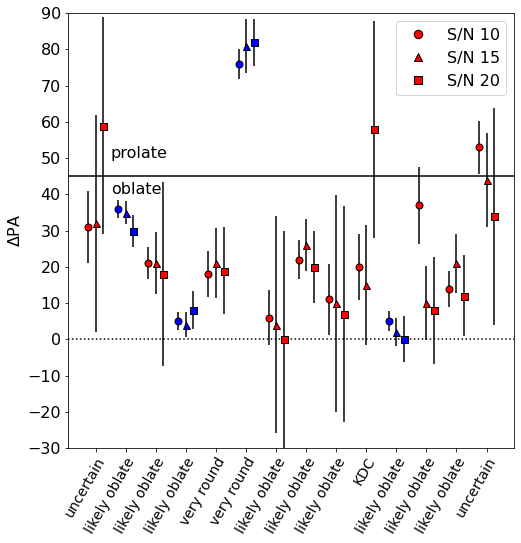

In [22]:
oblate_prolate = np.empty(14, dtype='U15')
markers = ['o','^','s']

fig, ax = plt.subplots(figsize=(8,8))
for i, obj_name in enumerate(obj_names): 
    
    obj_obl_pro = np.empty(3, dtype='U15')
        
    for j, SN in enumerate(vorbin_SN_targets):
        
        if i==2:
            file = f'{kinematics_dir}{obj_name}/target_sn_{SN}/{obj_name}_{SN}_final_kinematics/no_g/{obj_name}phot_kin_axis_info.txt'
        else:
            file = f'{kinematics_dir}{obj_name}/target_sn_{SN}/{obj_name}_{SN}_marginalized_gnog_final_kinematics/{obj_name}phot_kin_axis_info.txt'
        kin_axis = np.genfromtxt(file, delimiter=',') # PA_kin, dPA_kin (3 sigma), PA_phot, delta_PA, ellipticity
        #plt.errorbar(i, kin_axis[0], yerr=kin_axis[1], marker='o')
        
        delta_PA = np.abs(kin_axis[3])
        if delta_PA > 90:
            delta_PA = np.abs(180-delta_PA)
        dPA = kin_axis[1]
        #slacs_delta_PA = np.abs(classifications.loc[i, 'SLACS delta_PA'])
        ellipticity = paper_table.loc[i, 'ellipticity']
        classification = paper_table.loc[i, 'lambda_R_class']
        if classification == 'fast':
            color='b' # blue means fast/regular
        else:
            color='r' # red
        if i == 9:
            label='KDC'
            obj_obl_pro[j]=label
        elif ellipticity < 0.05:
            label='very round'
            obj_obl_pro[j]=label
        elif (delta_PA < 45) & (dPA < 45):
            label='likely oblate'
            obj_obl_pro[j]=label
        elif (delta_PA > 45) & (dPA < 45):
            label='likely prolate'
            obj_obl_pro[j]=label
        else:
            label='uncertain'
            obj_obl_pro[j]=label
            
        ax.errorbar(i-(1-j)*0.25, delta_PA, yerr=dPA, marker=markers[j], color=color, markersize=7, markeredgecolor='k', ecolor='k', ls='')
    if obj_obl_pro[1] == obj_obl_pro[0] and obj_obl_pro[2] == obj_obl_pro[0]:
        oblate_prolate[i] = obj_obl_pro[0]
    else:
        oblate_prolate[i] = 'uncertain'
    
plt.rcParams.update({'font.size': 16})

handles, labels = ax.get_legend_handles_labels()
handles = [h[0] for h in handles]
ax.legend(handles, labels=['S/N 10', 'S/N 15', 'S/N 20'], markerscale=1.2)
leg = ax.get_legend()
leg.legendHandles[0].set_color('none')
leg.legendHandles[1].set_color('none')
leg.legendHandles[2].set_color('none')

ax.set_ylim(-30, 90)
ax.axhline(45, color='k')
ax.axhline(0, color='k', linestyle=':')
ax.annotate('prolate',(0.5,50))
ax.annotate('oblate',(0.5,40))
ax.set_xticks(range(14), labels=oblate_prolate, rotation=60, ha='right', rotation_mode='anchor', fontsize=14)
ax.set_yticks(np.linspace(-30, 90, 13))
delta_pa_symbol = r'$\Delta$PA'
ax.set_ylabel(delta_pa_symbol, rotation=90)
plt.savefig(f'{kinematics_dir}oblate_prolate_marg_gnog_allsn.pdf', bbox_inches='tight')

In [7]:
classifications['oblate_prolate'] = oblate_prolate

In [8]:
# save
#date = '011323'
classifications.to_csv(f'{data_dir}classifications_etc_{date}.csv',index=False)

In [9]:
oblate_prolate == 'likely oblate'

array([False,  True, False,  True,  True, False, False,  True, False,
       False,  True, False,  True, False])

# What about delta_PA using the SLACS photometric PA?

slacs_delta_pa = np.empty(14)

for i in range(14):
    slacs_delta_pa[i] = min( [ np.abs(classifications.loc[i,'SLACS PA'] - classifications.loc[i,'PA_kin']),
                          180-np.abs(classifications.loc[i,'SLACS PA'] - classifications.loc[i,'PA_kin'])
                          ]
                           )

In [11]:
slacs_delta_pa = classifications['SLACS delta_PA']

In [12]:
slacs_delta_pa

0     66.4
1     34.9
2     24.9
3      1.5
4     20.1
5      6.3
6      3.3
7     19.7
8      6.0
9     23.0
10    -3.4
11    53.6
12    20.7
13    31.2
Name: SLACS delta_PA, dtype: float64

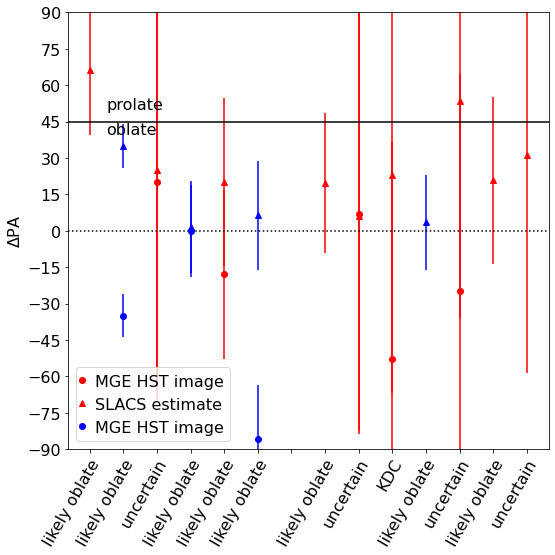

In [28]:
oblate_prolate = np.empty(14, dtype='U15')

fig, ax = plt.subplots(figsize=(8,8))
for i in range(14):
    if i == 6:
        oblate_prolate[i]=''
        continue
    delta_PA = classifications.loc[i, 'delta_PA']
    if delta_PA > 90:
        delta_PA = 180-delta_PA
    slacs_delta_PA = classifications.loc[i, 'SLACS delta_PA']
    dPA = classifications.loc[i, 'dPA_kin']
    classification = classifications.loc[i, 'lambda_R_class']
    if classification == 'fast':
        color='b' # black means fast/regular
    else:
        color='r' # read
    if i == 9:
        label='KDC'
        oblate_prolate[i]=label
    elif (delta_PA < 45) & (dPA < 45):
        label='likely oblate'
        oblate_prolate[i]=label
    elif (delta_PA > 45) & (dPA < 45):
        label='likely prolate'
        oblate_prolate[i]=label
    else:
        label='uncertain'
        oblate_prolate[i]=label
    ax.errorbar(i, delta_PA, yerr=dPA, marker='o', color=color, label='MGE HST image')
    ax.errorbar(i, np.abs(slacs_delta_PA), yerr=dPA, marker='^', color=color, linestyle='--', label='SLACS estimate')
    #ax.errorbar(i, bspline_delta_PA, yerr=dPA, marker='s', color=color, linestyle='--', label='MGE b-spline model')
ax.set_ylim(-90, 90)
ax.axhline(45, color='k')
ax.axhline(0, color='k', linestyle=':')
ax.annotate('prolate',(0.5,50))
ax.annotate('oblate',(0.5,40))
ax.set_xticks(range(14), labels=oblate_prolate, rotation=60, ha='right', rotation_mode='anchor')
ax.set_yticks(np.linspace(-90, 90, 13))
delta_pa_symbol = r'$\Delta$PA'
ax.set_ylabel(delta_pa_symbol, rotation=90)
handles, labels = ax.get_legend_handles_labels()
handles = [h[0] for h in handles]
ax.legend(handles[0:3], labels[0:3], handlelength=0, loc='lower left')
plt.tight_layout()
#plt.savefig(f'{data_dir}oblate_prolate_{date}.pdf')

# What about when I use the b-spline models?

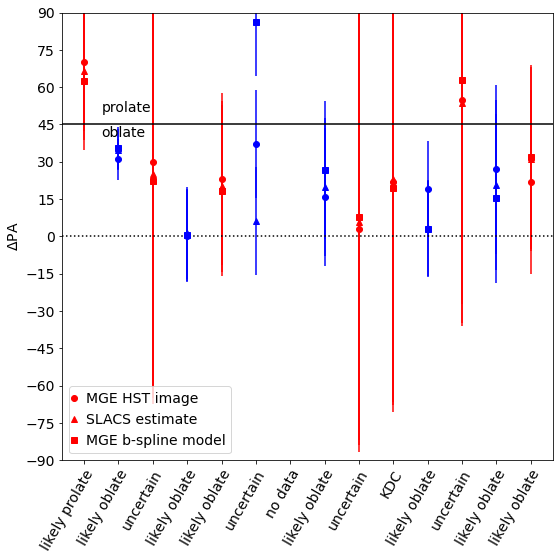

In [45]:
oblate_prolate = np.empty(14, dtype='U15')

fig, ax = plt.subplots(figsize=(8,8))
for i in range(14):
    if i == 6:
        oblate_prolate[i]='no data'
        continue
    delta_PA = classifications.loc[i, 'delta_PA']
    slacs_delta_PA = np.abs(classifications.loc[i, 'SLACS delta_PA'])
    bspline_delta_PA = classifications.loc[i, 'delta_PA_bspline']
    dPA = classifications.loc[i, 'dPA_kin']
    classification = classifications.loc[i, 'class']
    if classification == 'fast/regular':
        color='b' # black means fast/regular
    else:
        color='r' # read
    if i == 9:
        label='KDC'
        oblate_prolate[i]=label
    elif (delta_PA < 45) & (slacs_delta_PA < 45) & (bspline_delta_PA < 45) & (dPA < 45):
        label='likely oblate'
        oblate_prolate[i]=label
    elif (delta_PA > 45) & (slacs_delta_PA > 45) & (bspline_delta_PA > 45) & (dPA < 45):
        label='likely prolate'
        oblate_prolate[i]=label
    else:
        label='uncertain'
        oblate_prolate[i]=label
    ax.errorbar(i, delta_PA, yerr=dPA, marker='o', color=color, label='MGE HST image')
    ax.errorbar(i, slacs_delta_PA, yerr=dPA, marker='^', color=color, linestyle='--', label='SLACS estimate')
    ax.errorbar(i, bspline_delta_PA, yerr=dPA, marker='s', color=color, linestyle='--', label='MGE b-spline model')
ax.set_ylim(-90, 90)
ax.axhline(45, color='k')
ax.axhline(0, color='k', linestyle=':')
ax.annotate('prolate',(0.5,50))
ax.annotate('oblate',(0.5,40))
ax.set_xticks(range(14), labels=oblate_prolate, rotation=60, ha='right', rotation_mode='anchor')
ax.set_yticks(np.linspace(-90, 90, 13))
delta_pa_symbol = r'$\Delta$PA'
ax.set_ylabel(delta_pa_symbol, rotation=90)
handles, labels = ax.get_legend_handles_labels()
handles = [h[0] for h in handles]
ax.legend(handles[0:3], labels[0:3], handlelength=0, loc='lower left')
plt.tight_layout()
plt.savefig(f'{data_dir}oblate_prolate_{date}.pdf')

In [40]:
classifications.loc[8, 'ellipticity']

0.31

# The differences in the SLACS measurements do not affect the classification of prolate and oblate at all.

In [105]:
classifications

,obj_name,class,subclass,comments,ellipticity,SLACS ellipticity,effective_radius,SLACS PA,V_sigma,lambda_R,PA_phot,delta_PA,PA_kin,dPA_kin,oblate_prolate,SLACS delta_PA
0,SDSSJ0029-0055,slow/nonregular,"complex velocity, twist",V 60-80 km/s,0.13,0.160,2.16,26.6,0.107911,0.084878,23.427588,70.0,93.0,27.75,likely prolate,66.4
1,SDSSJ0037-0942,fast/regular,misaligned 31 deg,V 100 km/s,0.30,0.270,2.19,11.4,0.176446,0.158571,7.761124,31.0,156.5,8.25,likely oblate,34.9
2,SDSSJ0330-0020,uncertain,"possible rotation, misaligned 59 deg","Data poor, V 60 km/s",0.17,0.230,1.20,109.6,0.129017,0.109658,104.223376,30.0,134.5,89.75,uncertain,24.9
3,SDSSJ1112+0826,fast/regular,aligned 0 deg,V 100 km/s,0.24,0.230,1.50,137.5,0.263330,0.234192,136.098602,0.0,136.0,18.50,likely oblate,1.5
4,SDSSJ1204+0358,slow/nonregular,KDC,"V 40 km/s, signif arcs",0.09,0.030,1.47,132.1,0.077882,0.068771,135.080083,23.0,112.0,34.50,uncertain,20.1
5,SDSSJ1250+0523,fast/regular,"very round, alignment N/A","V 100 km/s, signif arcs",0.04,0.030,1.81,114.8,0.127693,0.112299,72.033772,37.0,108.5,21.75,likely oblate,6.3
6,SDSSJ1306+0600,fast/regular,misaligned 25 deg,"V 60 km/s, No HST image yet",-1.00,0.091,2.30,2.3,0.108517,0.091037,-1.000000,1.0,-1.0,-1.00,,3.3
7,SDSSJ1402+6321,fast/regular,misaligned 35 deg,V 60 km/s,0.22,0.230,2.70,70.8,0.095982,0.082576,75.302639,16.0,90.5,27.75,likely oblate,19.7
8,SDSSJ1531-0105,slow/nonregular,"no rotation, complex velocity, misaligned 41 deg",V 40 deg,0.31,0.320,2.50,143.5,0.078509,0.069539,145.972451,3.0,149.5,89.75,uncertain,6.0
9,SDSSJ1538+5817,fast/nonregular,"KDC, CRD? misaligned 22 deg","V 60 km/s outer, 20 deg inner",0.22,0.180,1.58,153.5,0.064735,0.049908,153.339746,22.0,130.5,89.75,uncertain,23.0


In [106]:
# save
date = '011323'
classifications.to_csv(f'{data_dir}classification_table_{date}.csv',index=False)